# Clustering
To resonates with statistics, here we can run-through for k-means clustering

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data_url = '/Users/dicky.girsang/Desktop/explore-with-ssmi-main/notebooks/data.csv'
df = pd.read_csv(data_url)
df = pd.DataFrame(df)
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.head(8)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,datetime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,2019-03-25 18:30:00
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,2019-02-25 14:36:00
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,2019-02-24 11:38:00


In [8]:
features = df[['Total', 'Quantity', 'Rating']]

# Handle potential missing values
features = features.dropna()
# Normalize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

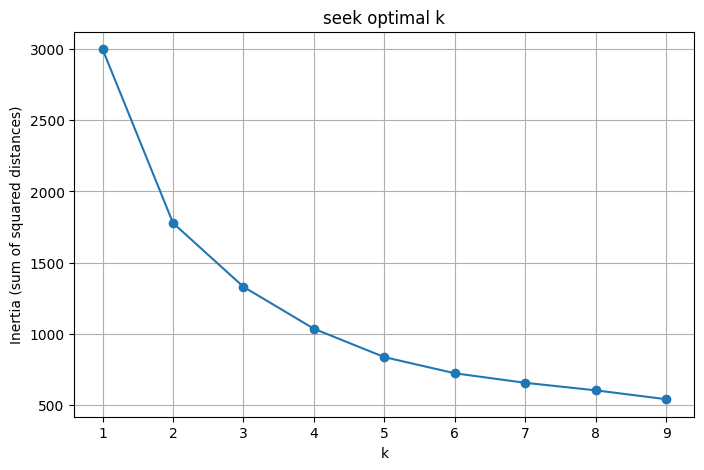

In [10]:
# elbow method as always guys!

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
# to define the x-axis
plt.plot(range(1, len(inertia) + 1), inertia, marker='o')
plt.title('seek optimal k')
plt.xlabel('k')
plt.ylabel('Inertia (sum of squared distances)')
plt.xticks(range(1, len(inertia) + 1))
plt.grid(True)
plt.show()

In [11]:
#  with the optimal number of clusters (k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(scaled_features)

# characteristics
cluster_analysis = df.groupby('cluster').agg(
    count=('Invoice ID', 'count'),
    avg_total=('Total', 'mean'),
    avg_quantity=('Quantity', 'mean'),
    avg_rating=('Rating', 'mean'),
    most_common_customer_type=('Customer type', lambda x: x.mode()[0]),
    most_common_product=('Product line', lambda x: x.mode()[0])
).round(2)

print(cluster_analysis)

         count  avg_total  avg_quantity  avg_rating most_common_customer_type  \
cluster                                                                         
0          267     167.25          3.58        8.55                    Normal   
1          215     546.77          8.28        5.37                    Member   
2          224     515.10          8.12        8.38                    Member   
3          294     154.33          3.25        5.64                    Member   

            most_common_product  
cluster                          
0            Food and beverages  
1        Electronic accessories  
2            Home and lifestyle  
3           Fashion accessories  


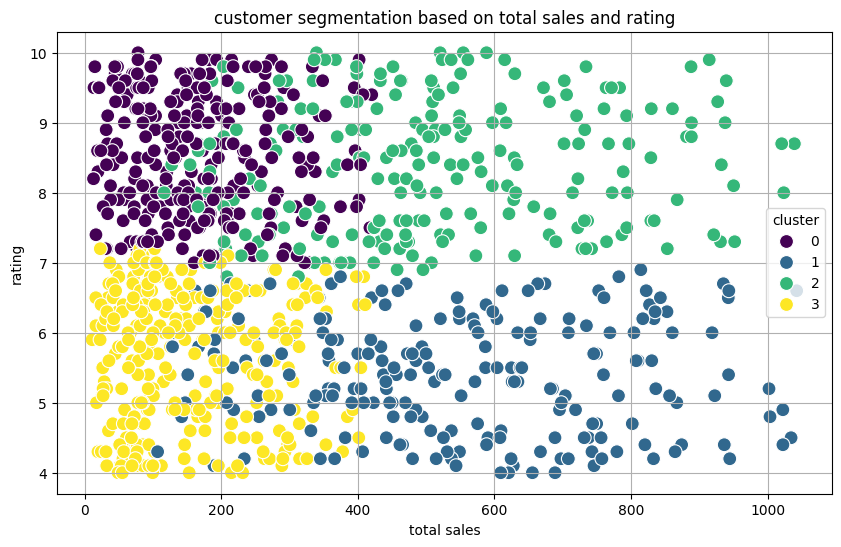

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Total',
    y='Rating',
    hue='cluster',
    data=df,
    palette='viridis',
    s=100
)
plt.title('customer segmentation based on total sales and rating')
plt.xlabel('total sales')
plt.ylabel('rating')
plt.grid(True)
plt.show()